In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-7.5402261473873295 -12.560860387952317
65.59497591632913 -83.09378134996197
-34.34765044076338 123.84422598709631
18.98459172871742 -117.68549795968269
-3.154083394205017 2.652890485455515
-45.784636141877314 -4.620402745354113
40.200125226073055 -144.36059146650922
-77.04926355775626 -156.31285493078573
-86.1210577834606 -53.83614424667006
-80.63892467834575 -141.62257510616894
-1.6444529115733815 30.475036947108606
-73.19136996457273 171.98841836534086
51.7355050087634 -43.46477524511843
45.36206634464122 -81.36766884862637
77.03561657673185 8.358135613077394
80.68220170983025 -33.651378558499545
25.6484954148587 -0.2406292778329373
-51.228920499028995 32.78259603791324
47.841652211661966 81.62375288865354
43.7243233619223 -116.7556442644213
58.0230873458554 91.07568964990077
-71.43186962062529 -133.78478503759862
71.08909123331838 -10.459074438283125
70.82343844635236 -98.66178039208789
65.20597461225927 130.36544563082072
24.639968327104683 -165.7679434305107
-77.5778446338314 -69

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Import the requests library.
import requests


In [8]:
# Import the API key.
from config import weather_api_key

In [44]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
##print(url)

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | constitucion
Processing Record 5 of Set 1 | port-gentil
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | rwamagana
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | wiarton
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | adrar
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | urdzhar
City not found. Skipping...
Processing Record 19 of Set 1 | caldwell
Processing Record 20 of Set 1 | rassvet

Processing Record 35 of Set 4 | copiapo
Processing Record 36 of Set 4 | mackay
Processing Record 37 of Set 4 | oranjemund
Processing Record 38 of Set 4 | ola
Processing Record 39 of Set 4 | capinopolis
Processing Record 40 of Set 4 | ryabovo
Processing Record 41 of Set 4 | rawson
Processing Record 42 of Set 4 | new norfolk
Processing Record 43 of Set 4 | narsaq
Processing Record 44 of Set 4 | guerrero negro
Processing Record 45 of Set 4 | srednekolymsk
Processing Record 46 of Set 4 | jamestown
Processing Record 47 of Set 4 | axim
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | taunggyi
Processing Record 50 of Set 4 | khuzdar
Processing Record 1 of Set 5 | delijan
Processing Record 2 of Set 5 | egvekinot
Processing Record 3 of Set 5 | port macquarie
Processing Record 4 of Set 5 | russkaya polyana
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | goderich
Processing Record 7 of Set 5 | marystown
Processing Record 8 of Set 5 | diego de alm

Processing Record 24 of Set 8 | nurota
Processing Record 25 of Set 8 | luzhou
Processing Record 26 of Set 8 | tabukiniberu
City not found. Skipping...
Processing Record 27 of Set 8 | bereda
Processing Record 28 of Set 8 | buin
Processing Record 29 of Set 8 | shingu
Processing Record 30 of Set 8 | lagoa
Processing Record 31 of Set 8 | makakilo city
Processing Record 32 of Set 8 | chabahar
Processing Record 33 of Set 8 | camacha
Processing Record 34 of Set 8 | afmadu
City not found. Skipping...
Processing Record 35 of Set 8 | gondanglegi
Processing Record 36 of Set 8 | taoudenni
Processing Record 37 of Set 8 | ninh binh
Processing Record 38 of Set 8 | vila
Processing Record 39 of Set 8 | warrington
Processing Record 40 of Set 8 | tamandare
Processing Record 41 of Set 8 | arkhangelsk
Processing Record 42 of Set 8 | kilindoni
Processing Record 43 of Set 8 | harlingen
Processing Record 44 of Set 8 | tuatapere
Processing Record 45 of Set 8 | kenora
Processing Record 46 of Set 8 | bethel
Proc

Processing Record 14 of Set 12 | karatu
Processing Record 15 of Set 12 | sao filipe
Processing Record 16 of Set 12 | broken hill
Processing Record 17 of Set 12 | zhezkazgan
Processing Record 18 of Set 12 | satitoa
City not found. Skipping...
Processing Record 19 of Set 12 | macusani
Processing Record 20 of Set 12 | pouembout
Processing Record 21 of Set 12 | san javier
Processing Record 22 of Set 12 | arman
Processing Record 23 of Set 12 | kuito
Processing Record 24 of Set 12 | basco
Processing Record 25 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 26 of Set 12 | bystryy istok
Processing Record 27 of Set 12 | luanda
Processing Record 28 of Set 12 | kozhva
Processing Record 29 of Set 12 | kadiri
Processing Record 30 of Set 12 | sorland
Processing Record 31 of Set 12 | uga
Processing Record 32 of Set 12 | nalut
Processing Record 33 of Set 12 | manakara
Processing Record 34 of Set 12 | jieshi
Processing Record 35 of Set 12 | bud
Processing Record 36 of Set 1

In [12]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df[new_column_order].head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2022-05-13 23:05:02,5.4112,100.3354,82.33,83,20,0.00
1,Esperance,AU,2022-05-13 23:08:06,-33.8667,121.9000,55.04,66,71,19.37
2,Constitucion,CL,2022-05-13 23:05:59,-35.3333,-72.4167,53.01,69,42,10.00
3,Port-Gentil,GA,2022-05-13 23:08:07,-0.7193,8.7815,80.56,89,75,11.50
4,Cape Town,ZA,2022-05-13 23:05:07,-33.9258,18.4232,58.12,91,45,1.01
5,Sitka,US,2022-05-13 23:08:07,57.0531,-135.3300,49.89,66,75,16.11
6,Mataura,NZ,2022-05-13 23:08:08,-46.1927,168.8643,52.48,93,86,1.72
7,Ushuaia,AR,2022-05-13 23:08:09,-54.8000,-68.3000,42.46,93,75,8.05
8,Rwamagana,RW,2022-05-13 23:08:09,-1.9487,30.4347,67.44,96,80,2.17
9,Bluff,NZ,2022-05-13 23:08:09,-46.6000,168.3333,52.81,89,89,6.76


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

In [15]:
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import time module
import time

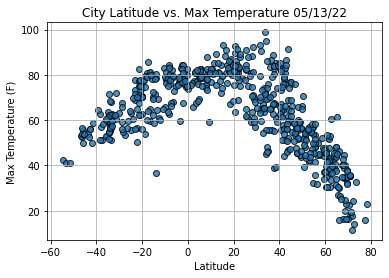

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

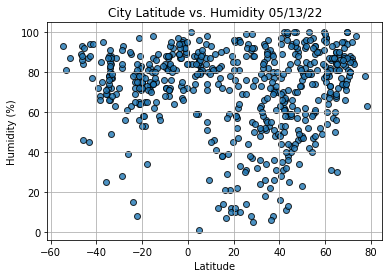

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

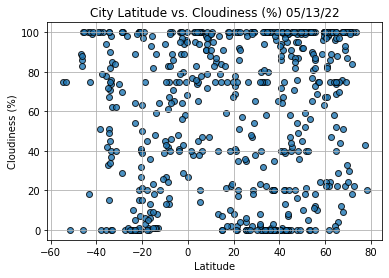

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

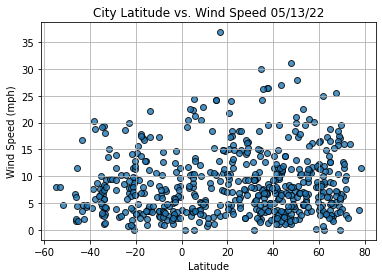

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

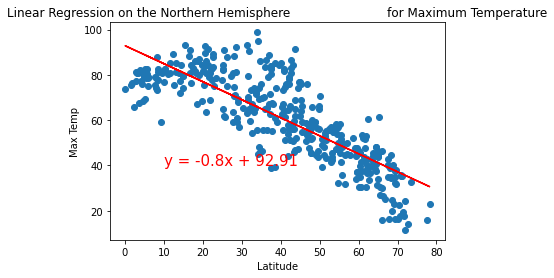

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

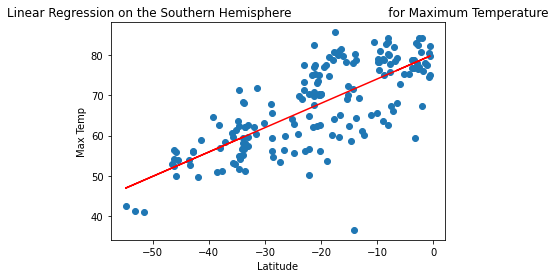

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

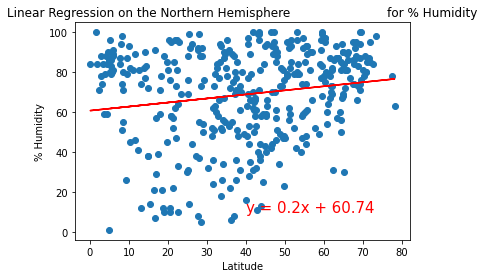

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

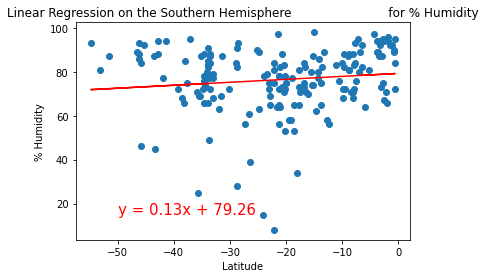

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

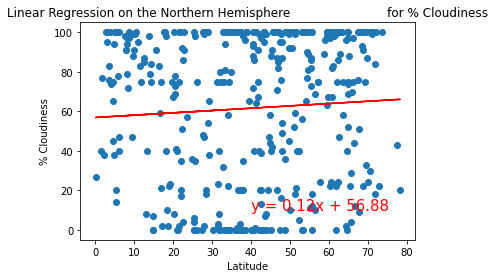

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

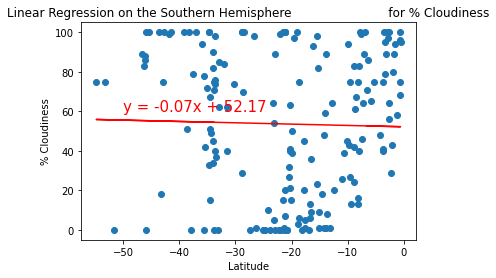

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

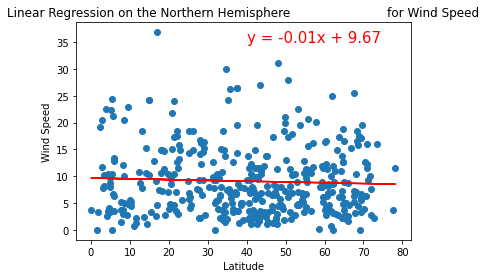

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

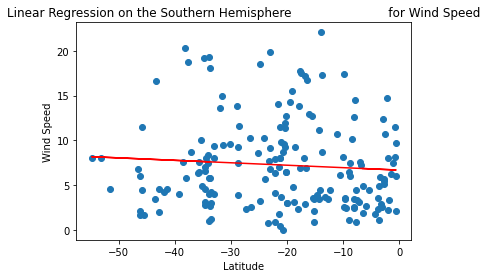

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

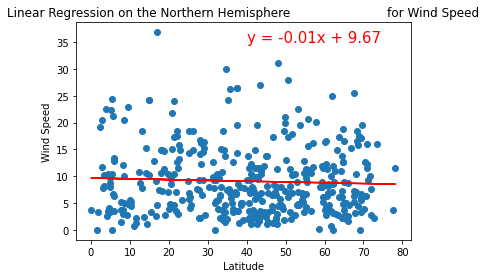

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

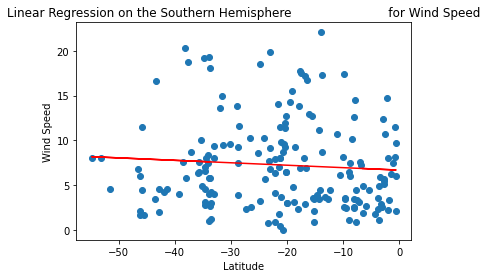

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))